# **IMPORTANDO AS BIBLIOTECAS**

In [30]:
from statistics import median

import pandas as pd # biblioteca para manipulação de dados
import seaborn as sns  # biblioteca para visualização de dados
import matplotlib.pyplot as plt # biblioteca para visualização de dados
import numpy as np # biblioteca para cálculos matemáticos

# **IMPORTANDO OS DADOS**

In [31]:
carros = pd.read_csv(r"C:\\Users\\marco\\OneDrive\\Documentos\Carros mais vendidos 2025\\used_car_listings.csv")

pd.set_option('display.max_rows', None) # para mostrar todas as linhas
pd.set_option('display.max_columns', None) # para mostrar todas as colunas
pd.set_option('display.width', None) # para mostrar todas as colunas sem quebrar a linha

pd.set_option('display.float_format', '{:.2f}'.format) # para mostrar os números com 2 casas decimais


carros.head(2)

,listing_id,vin,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features
0,1,9M6LF68V634LY2252,Tesla,Model 3,2019,NaN,Coupe,Electric,Manual,46134,19919.00,good,"New Lindsey, GA, US",Dealer,"Alloy Wheels, Android Auto, Apple CarPlay, Fog..."
1,2,1S0ZCY536BSCY2864,Nissan,Rogue,2024,LT,Sedan,Hybrid,Automatic,16109,19480.00,good,"Pughtown, CO, US",Dealer,"Alloy Wheels, Android Auto, Lane Keep Assist, ..."


# **RENOMEANDO AS COLUNAS PARA PORTUGUÊS**

In [32]:
carros.rename(columns={
    'listing_id': 'id_lista',
    'vin': 'N° Identificação Veículo',
    'make': 'marca',
    'model': 'modelo',
    'year': 'ano',
    'trim': 'versão',
    'body_type': 'tipo_carroceria',
    'fuel_type': 'tipo_combustivel',
    'transmission': 'transmissão',
    'mileage': 'quilometragem',
    'price': 'preço',
    'condition': 'condição',
    'location': 'localização',
    'seller_type': 'tipo_vendedor',
    'features': 'características'}, inplace=True)

# **ANALISANDO OS DADOS**

## **Exibindo as 5 primeiras linhas do DataFrame com o .head()**

In [33]:
# Exibe as primeiras 5 linhas do DataFrame
carros.head()

,id_lista,N° Identificação Veículo,marca,modelo,ano,versão,tipo_carroceria,tipo_combustivel,transmissão,quilometragem,preço,condição,localização,tipo_vendedor,características
0,1,9M6LF68V634LY2252,Tesla,Model 3,2019,NaN,Coupe,Electric,Manual,46134,19919.00,good,"New Lindsey, GA, US",Dealer,"Alloy Wheels, Android Auto, Apple CarPlay, Fog..."
1,2,1S0ZCY536BSCY2864,Nissan,Rogue,2024,LT,Sedan,Hybrid,Automatic,16109,19480.00,good,"Pughtown, CO, US",Dealer,"Alloy Wheels, Android Auto, Lane Keep Assist, ..."
2,3,YFB625BN0RTMZ5590,Hyundai,i20,2018,XLE,Crossover,Petrol,Automatic,173239,4556.00,good,"Satna, HR, India",Dealer,"Alloy Wheels, Bluetooth, Panoramic Roof, Sunroof"
3,4,CPMZ4RFN5WYL37096,Kia,Sportage,2023,EX,Hatchback,Diesel,CVT,36810,11536.00,fair,"山武市, Osaka, Japan",Certified Pre-Owned,"Alloy Wheels, Bluetooth, Keyless Entry, Naviga..."
4,5,4PJZG3MV6D9365673,Kia,Seltos,2020,Trend,Pickup,Diesel,Automatic,87749,14098.00,good,"長生郡長生村, Osaka, Japan",Certified Pre-Owned,"Apple CarPlay, Backup Camera, Bluetooth, Heate..."


In [34]:
# Exibe as últimas 5 linhas do DataFrame
carros.tail()

,id_lista,N° Identificação Veículo,marca,modelo,ano,versão,tipo_carroceria,tipo_combustivel,transmissão,quilometragem,preço,condição,localização,tipo_vendedor,características
2063,2064,06B83BVF8F2W81547,Skoda,Kushaq,2023,Sport,Pickup,Petrol,Automatic,24566,34696.00,like new,"Shahjahanpur, KA, India",Certified Pre-Owned,"Blind Spot Monitor, Keyless Entry, Panoramic R..."
2064,2065,4P7083L79MBVK5696,Mahindra,Scorpio,2016,XSE,SUV,Diesel,Automatic,122459,2642.00,excellent,"Marques, PR, Brazil",Dealer,"Adaptive Cruise Control, Backup Camera, LED He..."
2065,2066,5RERFW1M7B00A4061,Audi,A6,2018,EX,Hatchback,Diesel,DCT,120452,7093.00,good,"Dhanbad, KL, India",Private Party,"Adaptive Cruise Control, Android Auto, Blind S..."
2066,2067,DJB6DBAS5UNNX0757,Skoda,Kushaq,2021,LX,MPV,Petrol,Manual,57043,11296.00,excellent,"Caitlinstad, NL, Canada",Certified Pre-Owned,"Backup Camera, Panoramic Roof, Parking Sensors..."
2067,2068,8BUANECR64R9L0827,Chevrolet,Malibu,2024,Platinum,Sedan,Diesel,Automatic,20218,23558.00,excellent,"Stadtroda, HH, Germany",Certified Pre-Owned,"Adaptive Cruise Control, Android Auto, Apple C..."


## **Exibindo as informações sobre os tipos de dados com o .info()**

In [35]:
# Exibe informações sobre os tipos de dados e valores não nulos
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_lista                  2068 non-null   int64  
 1   N° Identificação Veículo  2068 non-null   object 
 2   marca                     2068 non-null   object 
 3   modelo                    2068 non-null   object 
 4   ano                       2068 non-null   int64  
 5   versão                    1824 non-null   object 
 6   tipo_carroceria           2068 non-null   object 
 7   tipo_combustivel          2068 non-null   object 
 8   transmissão               2068 non-null   object 
 9   quilometragem             2068 non-null   int64  
 10  preço                     2068 non-null   float64
 11  condição                  2022 non-null   object 
 12  localização               2068 non-null   object 
 13  tipo_vendedor             2068 non-null   object 
 14  caracter

## **Exibindo o número de linhas e colunas com o .shape**

In [36]:
# Exibe o número de linhas e colunas do DataFrame
carros.shape

(2068, 15)

## Exibindo estatísticas descritivas para colunas numéricas com o .describe()

In [37]:
# Exibe estatísticas descritivas para colunas numéricas
carros.describe()

,id_lista,ano,quilometragem,preço
count,2068.00,2068.00,2068.00,2068.00
mean,1034.50,2016.98,115626.36,9182.62
std,597.12,4.61,80971.11,9964.09
min,1.00,2005.00,0.00,1140.00
25%,517.75,2014.00,57683.25,2323.75
50%,1034.50,2017.00,99212.00,5448.50
75%,1551.25,2020.00,159291.50,11946.75
max,2068.00,2025.00,418428.00,72641.00


## Verificando valores ausentes com o .isnull().sum()

In [38]:
# Exibe o número de valores ausentes em cada coluna
carros.isnull().sum().sort_values(ascending=False)

versão                      244
características             151
condição                     46
marca                         0
modelo                        0
N° Identificação Veículo      0
id_lista                      0
tipo_carroceria               0
ano                           0
tipo_combustivel              0
transmissão                   0
preço                         0
quilometragem                 0
localização                   0
tipo_vendedor                 0
dtype: int64

## Visualizando o percentual de valores vazios em cada coluna

In [39]:
# Exibe o percentual de valores ausentes em cada coluna
(carros.isnull().sum() / len(carros) * 100).sort_values(ascending=False)

versão                     11.80
características             7.30
condição                    2.22
marca                       0.00
modelo                      0.00
N° Identificação Veículo    0.00
id_lista                    0.00
tipo_carroceria             0.00
ano                         0.00
tipo_combustivel            0.00
transmissão                 0.00
preço                       0.00
quilometragem               0.00
localização                 0.00
tipo_vendedor               0.00
dtype: float64

## **Preenchendo valores ausentes nas colunas 'versão', 'condição e 'caracteristicas**

In [40]:
carros.fillna({'versão': 'desconhecido',
               'condição': 'desconhecido',
               'características': 'desconhecido'}, inplace=True)
carros.isnull().sum()


id_lista                    0
N° Identificação Veículo    0
marca                       0
modelo                      0
ano                         0
versão                      0
tipo_carroceria             0
tipo_combustivel            0
transmissão                 0
quilometragem               0
preço                       0
condição                    0
localização                 0
tipo_vendedor               0
características             0
dtype: int64

## ****Verificando se há valores duplicados****

In [41]:
# Exibe o número de linhas duplicadas
carros.duplicated().sum()

np.int64(0)

## **Verificando se há valores iguais a zero nas colunas numéricas**

In [42]:
# Exibe o número de valores iguais a zero em cada coluna
(carros == 0).sum().sort_values(ascending=False)

quilometragem               79
N° Identificação Veículo     0
id_lista                     0
modelo                       0
ano                          0
versão                       0
marca                        0
tipo_carroceria              0
tipo_combustivel             0
transmissão                  0
preço                        0
condição                     0
localização                  0
tipo_vendedor                0
características              0
dtype: int64

## **Tratando a coluna 'quilometragem' que possui valores iguais a zero**

In [43]:
# Calcula a mediana ignorando os zeros
mediana = carros[carros['quilometragem'] != 0]['quilometragem'].median()

# Substitui os zeros pela mediana calculada
carros['quilometragem'] = carros['quilometragem'].replace(0, mediana)

carros['quilometragem'].describe()

count     2068.00
mean    119560.82
std      77691.43
min       5714.00
25%      63954.00
50%     102993.00
75%     159291.50
max     418428.00
Name: quilometragem, dtype: float64

## **Crianddo 3 novas colunas a partir dos dados da coluna 'localização' que continha Unidade Federativa (UF), Estado e País separados por virgula.**

In [44]:
carros[['estado', 'uf', 'pais']] = carros['localização'].str.split(',', expand=True) # expand=True cria novas colunas

# Removendo espaços em branco extras (se houver)
carros['estado'] = carros['estado'].str.strip()
carros['uf'] = carros['uf'].str.strip()
carros['pais'] = carros['pais'].str.strip()

carros[['estado', 'uf', 'pais']].head(5)  # Exibe as primeiras 5 linhas do DataFrame após a separação

,estado,uf,pais
0,New Lindsey,GA,US
1,Pughtown,CO,US
2,Satna,HR,India
3,山武市,Osaka,Japan
4,長生郡長生村,Osaka,Japan


## **Criando novas colunas**

In [45]:
carros["idade"]=2025-carros['ano']
carros["km_ano"]=carros['quilometragem']/carros["idade"]

carros[["idade","km_ano"]].head(10)

,idade,km_ano
0,6,7689.00
1,1,16109.00
2,7,24748.43
3,2,18405.00
4,5,17549.80
5,6,10142.17
6,12,7730.17
7,8,25594.12
8,7,14760.29
9,10,11932.10


In [46]:
# Exibe as últimas 10 linhas do DataFrame após a criação das novas colunas
carros[['idade', 'km_ano']].tail(10)

,idade,km_ano
2058,0,inf
2059,5,22888.00
2060,8,18626.62
2061,15,13719.27
2062,5,17371.20
2063,2,12283.00
2064,9,13606.56
2065,7,17207.43
2066,4,14260.75
2067,1,20218.00


## **Substituindo valores infinitos e NaN na coluna 'km_ano'**

In [47]:
carros['km_ano'] = carros['km_ano'].replace([np.inf, -np.inf], np.nan) # Substitui inf e -inf por NaN
carros['km_ano'] = carros['km_ano'].fillna(carros['km_ano'].median()) # Preenche NaN com a mediana
carros['km_ano'].describe()

count    2068.00
mean    14373.76
std      4947.22
min      5515.25
25%     10782.00
50%     13684.21
75%     16626.80
max     27018.00
Name: km_ano, dtype: float64

In [48]:
carros['km_ano'].tail(10)

2058   13684.21
2059   22888.00
2060   18626.62
2061   13719.27
2062   17371.20
2063   12283.00
2064   13606.56
2065   17207.43
2066   14260.75
2067   20218.00
Name: km_ano, dtype: float64

In [49]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_lista                  2068 non-null   int64  
 1   N° Identificação Veículo  2068 non-null   object 
 2   marca                     2068 non-null   object 
 3   modelo                    2068 non-null   object 
 4   ano                       2068 non-null   int64  
 5   versão                    2068 non-null   object 
 6   tipo_carroceria           2068 non-null   object 
 7   tipo_combustivel          2068 non-null   object 
 8   transmissão               2068 non-null   object 
 9   quilometragem             2068 non-null   int64  
 10  preço                     2068 non-null   float64
 11  condição                  2068 non-null   object 
 12  localização               2068 non-null   object 
 13  tipo_vendedor             2068 non-null   object 
 14  caracter

## **Excluindo colunas que nao afetaram as análises.**

In [50]:
carros = carros.drop(['N° Identificação Veículo','tipo_vendedor', 'versão','localização', 'id_lista','características'], axis=1)
carros.head()

,marca,modelo,ano,tipo_carroceria,tipo_combustivel,transmissão,quilometragem,preço,condição,estado,uf,pais,idade,km_ano
0,Tesla,Model 3,2019,Coupe,Electric,Manual,46134,19919.00,good,New Lindsey,GA,US,6,7689.00
1,Nissan,Rogue,2024,Sedan,Hybrid,Automatic,16109,19480.00,good,Pughtown,CO,US,1,16109.00
2,Hyundai,i20,2018,Crossover,Petrol,Automatic,173239,4556.00,good,Satna,HR,India,7,24748.43
3,Kia,Sportage,2023,Hatchback,Diesel,CVT,36810,11536.00,fair,山武市,Osaka,Japan,2,18405.00
4,Kia,Seltos,2020,Pickup,Diesel,Automatic,87749,14098.00,good,長生郡長生村,Osaka,Japan,5,17549.80


# ****Importanto para CSV****

In [51]:
carros.to_csv("carros_2025.csv", index=False, sep=";", encoding="utf-8", decimal=",", float_format="%.2f")

# _**ANÁLISES**_

## **Média de preço por país**

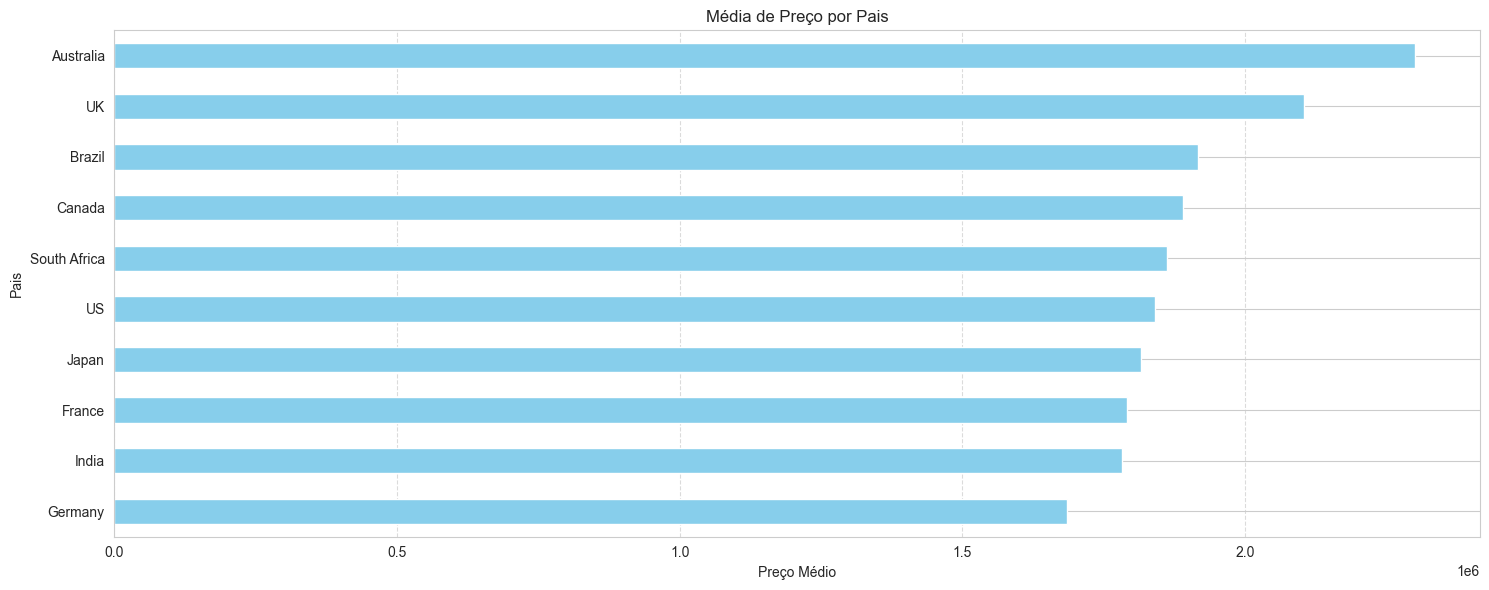

In [52]:
import matplotlib.pyplot as plt

# Agrupando por pais e calculando a média de preço
media_por_local = carros.groupby('pais')['preço'].sum().sort_values()

# Criando o gráfico
plt.figure(figsize=(15,6)) # Define o tamanho da figura
media_por_local.plot(kind='barh', color='skyblue') # Gráfico de barras horizontais
plt.title('Média de Preço por Pais') # Título do gráfico
plt.xlabel('Preço Médio') # Título do eixo X
plt.ylabel('Pais') # Título do eixo Y
plt.xticks(rotation=0) # Rotação dos nomes no eixo X
plt.grid(axis='x', linestyle='--', alpha=0.7) # Adiciona uma grade ao gráfico
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show() # Exibe o gráfico


# **TOP 10 Fabricantes em Anúncios de Veículos (2025)**

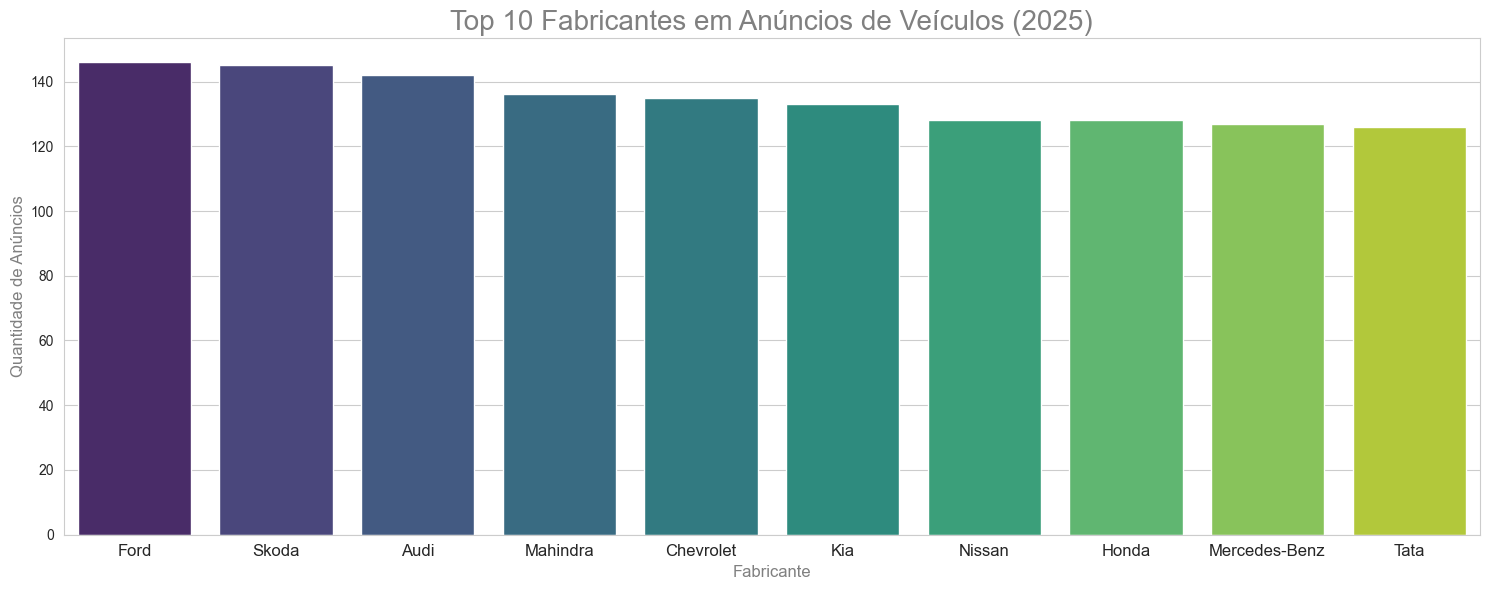

In [53]:
# Estilo do gráfico
sns.set_style("whitegrid")

# Contar os fabricantes mais frequentes
fabricantes_freq = carros['marca'].value_counts().nlargest(10)

# Criar o gráfico de barras verticais
plt.figure(figsize=(15, 6))
sns.barplot(x=fabricantes_freq.index, y=fabricantes_freq.values, hue=fabricantes_freq.index, palette="viridis", legend=False)

plt.title('Top 10 Fabricantes em Anúncios de Veículos (2025)', fontsize=20, color='gray') # Título do gráfico
plt.xlabel('Fabricante', fontsize=12, color='gray') # Titulo do eixo X
plt.ylabel('Quantidade de Anúncios', fontsize=12, color='gray') # Titulo do eixo Y
plt.xticks(rotation=0, fontsize=12) # Rotação dos nomes no eixo X e Tamanho da fonte
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()


## **Media de quilometragem por país**

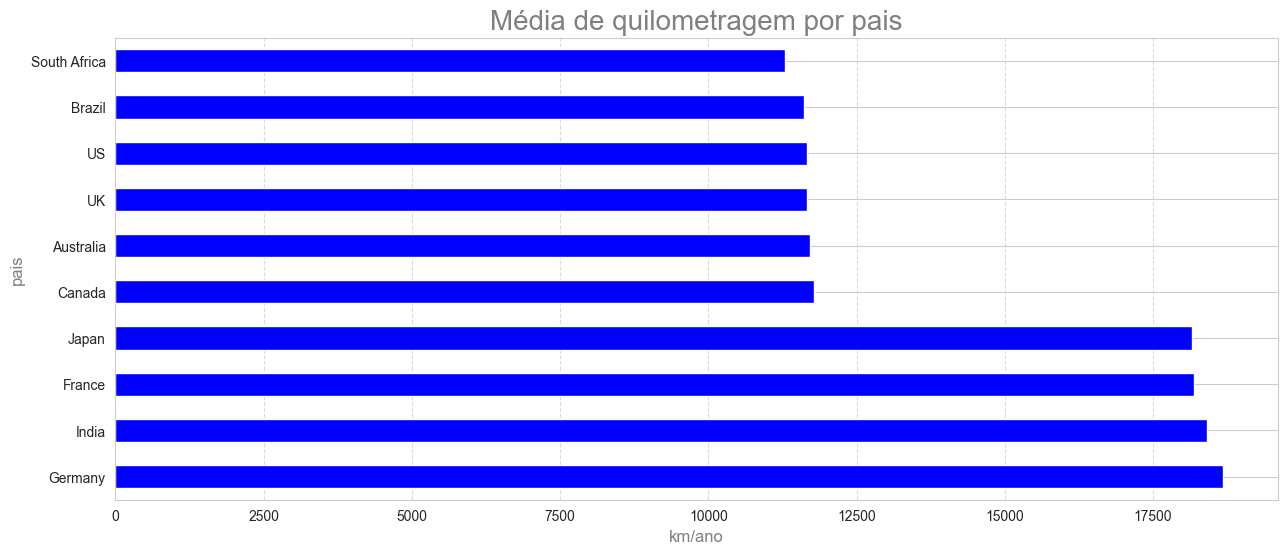

In [59]:
carros.groupby(by="pais").mean(numeric_only=True).sort_values(by="km_ano",ascending=False).plot(y="km_ano",kind="barh",figsize=(15,6),color="blue", legend=False)
plt.title("Média de quilometragem por pais", fontsize=20, color='gray')
plt.xlabel("km/ano", fontsize=12, color='gray')
plt.ylabel("pais", fontsize=12, color='gray')
plt.grid(axis='x', linestyle='--', alpha=0.7) # Adiciona uma grade ao gráfico

plt.show()

## **Analisando a quilometragem média por tipo de combustível**

In [55]:
# Agrupar e calcular a média por tipo de combustível
km_por_combustivel = carros.groupby('tipo_combustivel')['quilometragem'].mean().sort_values(ascending=False)

# Exibir os resultados formatados
for tipo, media in km_por_combustivel.items():
    valor_formatado = f"{media:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")
    print(f"{tipo:<18} {valor_formatado} km")



CNG                134.395 km
Diesel             125.058 km
Hybrid             124.246 km
Petrol             121.000 km
Plug-in Hybrid     100.009 km
Electric           96.974 km


Os carros movidos a CNG (gás natural) têm, em média, a maior quilometragem, seguidos por Diesel e Hybrid

##  **Idade Média por Tipo de Carroceria**

In [56]:

# Agrupar e calcular a média da idade por tipo de carroceria
idade_por_carroceria = carros.groupby('tipo_carroceria')['idade'].mean().sort_values()

# Exibir o resultado formatado com separador de milhar e 2 casas decimais
for tipo, media in idade_por_carroceria.items():
    print(f"{tipo:<15} {media:5.2f} anos")


Hatchback        7.39 anos
MPV              7.46 anos
Convertible      7.90 anos
Crossover        7.96 anos
SUV              8.00 anos
Sedan            8.11 anos
Pickup           8.35 anos
Coupe            8.40 anos
Van              8.65 anos


Os carros Hatchback e MPV são os mais novos em média, enquanto os Van e Coupe tendem a ser mais antigos

## **Gráfico de dispersão que mostra a correlação entre idade e preço dos carros**

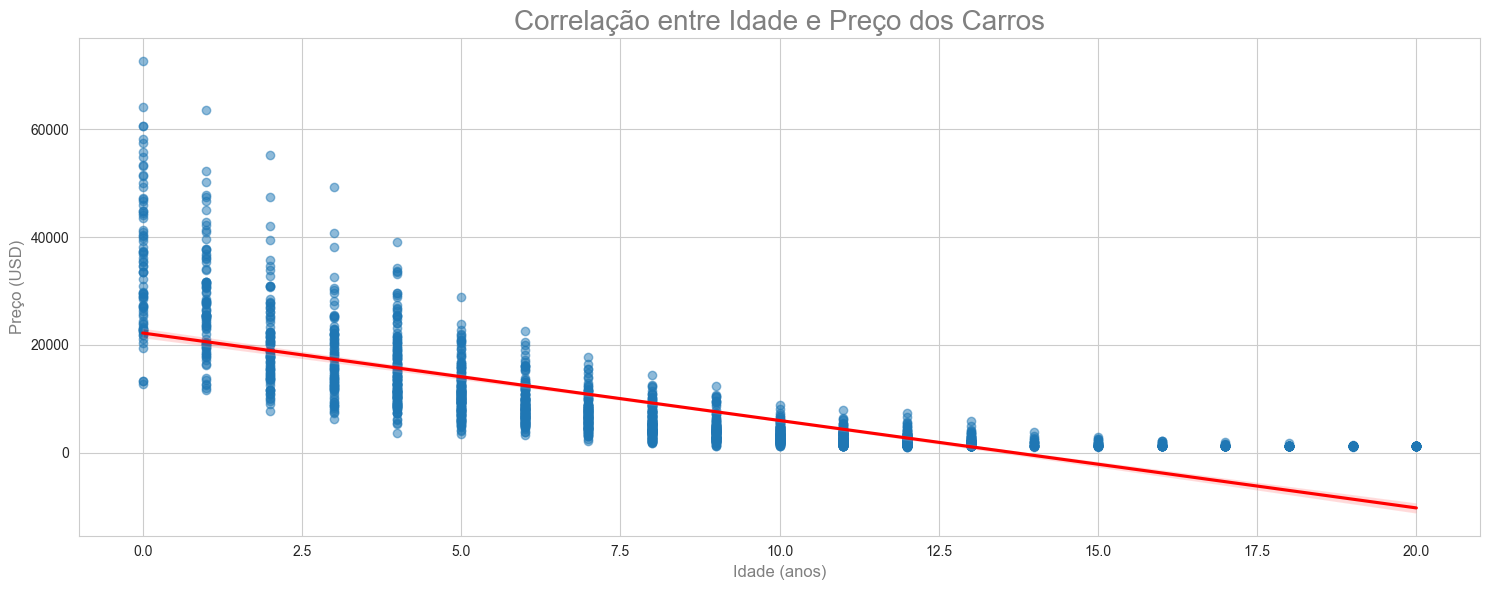

In [57]:
# Converter colunas para numérico
carros['preço'] = carros['preço'].astype(str).str.replace(',', '.').astype(float)
carros['idade'] = pd.to_numeric(carros['idade'], errors='coerce')

# Criar gráfico de dispersão com linha de tendência
plt.figure(figsize=(15, 6)) # Define o tamanho da figura

# cria o gráfico de dispersão com linha de tendência
sns.regplot(
    x='idade',
    y='preço',
    data=carros,
    scatter_kws={'alpha': 0.5},     # transparência dos pontos
    line_kws={'color': 'red'}       # cor da linha de tendência
)

# Adiciona títulos e rótulos
plt.title('Correlação entre Idade e Preço dos Carros', fontsize=20, color='gray')
plt.xlabel('Idade (anos)', fontsize=12, color='gray')
plt.ylabel('Preço (USD)', fontsize=12, color='gray')
plt.grid(True) # Adiciona uma grade ao gráfico
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()

**Tendência negativa:** Em geral, há uma tendência de queda no preço conforme a idade aumenta

A dispersão mostra que há exceções — alguns carros antigos ainda têm preços elevados, possivelmente por serem modelos de luxo ou elétricos

## **Total de Carros Vendidos por Condição**

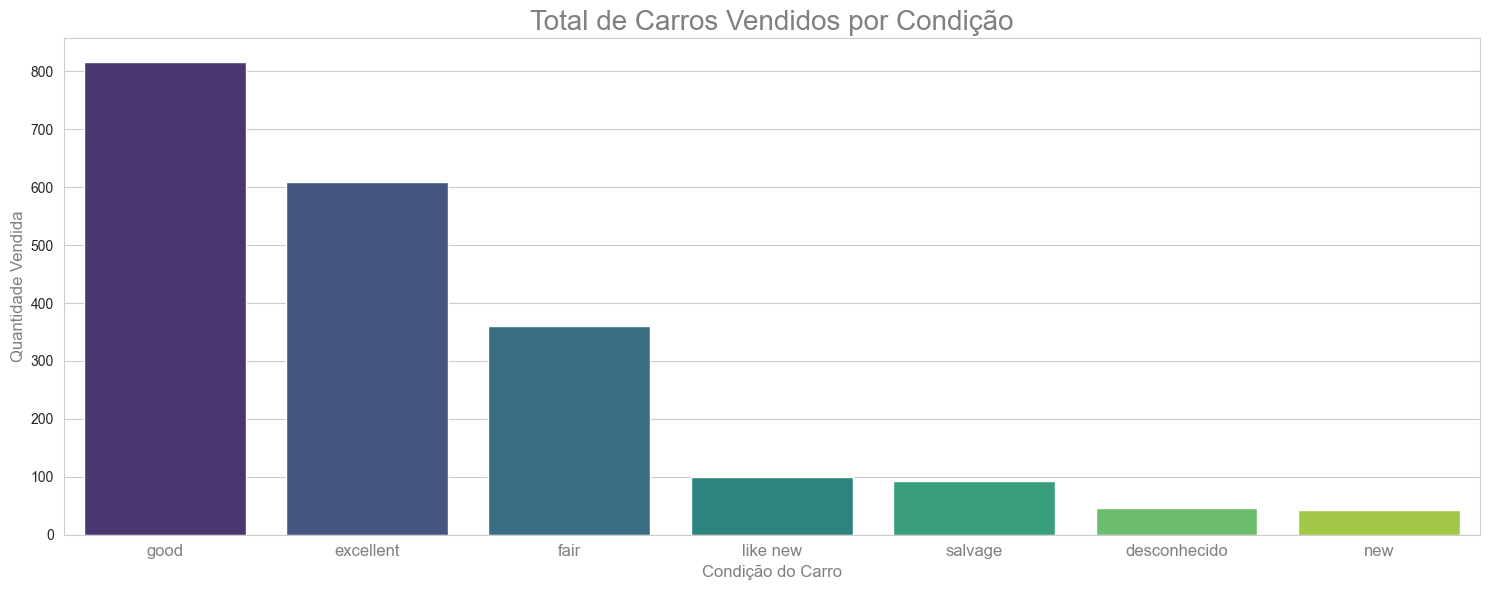

In [58]:
# Contar o número de carros por condição
contagem_condicao = carros['condição'].value_counts().sort_values(ascending=False).reset_index()
contagem_condicao.columns = ['condição', 'quantidade']

# Criar gráfico de barras com hue para evitar aviso de depreciação
plt.figure(figsize=(15, 6))
sns.barplot(data=contagem_condicao, x='condição', y='quantidade', hue='condição', dodge=False, palette='viridis')

# Ajustes visuais
plt.title('Total de Carros Vendidos por Condição', fontsize=20, color='gray')
plt.xlabel('Condição do Carro', fontsize=12, color='gray')
plt.ylabel('Quantidade Vendida', fontsize=12, color='gray')
plt.legend([], [], frameon=False)  # remove legenda duplicada
plt.xticks(rotation=0, fontsize=12, color='gray')  # Rotação dos nomes no eixo X e Tamanho da fonte
plt.tight_layout()
plt.show()